In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline

if not os.path.exists("./evaluation"):
    os.mkdir("./evaluation")

hardware_cpus = 8

files = [
    "trapezio_sendReceive",
    "trapezio_reduce",
    "vxv_sendReceive",
    "vxv_reduce",
    "mxv 4000 4000"
]

filename = files[3]

In [96]:
n_processes = list(range(1,17))
n_repetitions = 20

for i in range(n_repetitions):
    print(f"{i}/{n_repetitions}\t", end="")
    for j in range(len(n_processes)):
        print("_", end="")
        os.system(f"mpirun -np {n_processes[j]} ./bin/{filename}")
    print()

0/20	________________
1/20	________________
2/20	________________
3/20	________________
4/20	_______________

In [94]:
df = pd.read_csv(f"./evaluation/{filename}.csv")

FileNotFoundError: [Errno 2] No such file or directory: './evaluation/produtoVetorial_reduce.csv'

In [85]:
t0 = df.groupby(by=["n_processes"]).mean()["wtime"][1]
t0

0.02938340000000001

In [86]:
df["n_cpus"] = df["n_processes"].apply(lambda x: min(hardware_cpus, x))

In [87]:
df["speedup"] = t0 / df["wtime"]
df["efficiency"] = df["speedup"] / df["n_cpus"]
df["overloaded"] = df["n_processes"] > hardware_cpus
df.head()

n_processes     wtime  n_cpus   speedup  efficiency  overloaded
0            1  0.019432       1  1.512114    1.512114       False
1            2  0.033801       2  0.869306    0.434653       False
2            3  0.036184       3  0.812055    0.270685       False
3            4  0.051748       4  0.567817    0.141954       False
4            5  0.062841       5  0.467583    0.093517       False

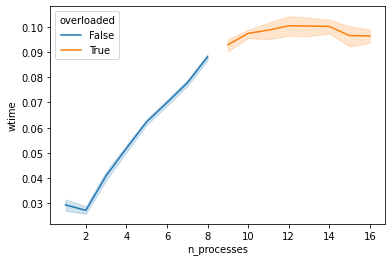

In [88]:
ax = sns.lineplot(x="n_processes", y="wtime", data=df, hue="overloaded")
plt.savefig(f'./evaluation/{filename}_wtime.png')

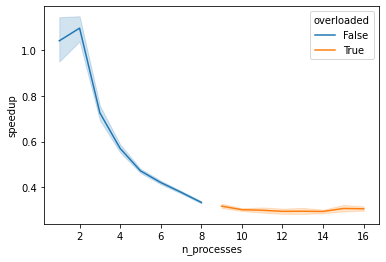

In [89]:
ax = sns.lineplot(x="n_processes", y="speedup", data=df, hue="overloaded")
plt.savefig(f'./evaluation/{filename}_speedup.png')

In [90]:
ax = sns.lineplot(x="n_processes", y="efficiency", data=df, hue="overloaded")
plt.savefig(f'./evaluation/{filename}_efficiency.png')